NEWS ARTICLE CLASSIFICATION

In [92]:
#importing necessary libraries
import numpy as np

In [93]:
import pandas as pd

In [94]:
df=pd.read_csv('news_train.csv')

In [95]:
df.head(10)

,ID,News_title,News_headline,Category
0,1,"Do men enjoy sex more, or women? The Mahabhara...","[Book Extract] From Anushasana Parva, translat...",Arts
1,2,Why you should eat the Demonetisation laddoo,One laddoo equals to one lakh in your Jan Dhan...,humour
2,3,Is the world headed for a new Cold War?,The battle lines have become very clear with R...,politics
3,4,"Demonetisation is all about Modi, either you'r...",How many times should this hypocritical drama ...,business
4,5,Why electoral bonds won't clean up political f...,Union finance minister Arun Jaitley needs to p...,politics
5,6,"Booze, beef and gambling in Goa: BJP's Hindutv...",These double standards are not just shocking b...,politics
6,7,Beef politics is taking a bite out of Meghalay...,Party leader in northeastern state quits over ...,politics
7,8,What Shivraj Singh Chouhan did when Modi was t...,The Madhya Pradesh chief minister has killed i...,politics
8,9,No marks for Chennai’s Bala Vidya Mandir,"The school will sink into quicksand, unless it...",politics
9,10,Refrain that India's armed forces can do no wr...,"Pathankot, Uri, Nagrota and Baramullah attacks...",politics


DATA CLEANING

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15576 entries, 0 to 15575
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   ID             15576 non-null  int64 
 1   News_title     15576 non-null  object
 2   News_headline  15500 non-null  object
 3   Category       15576 non-null  object
dtypes: int64(1), object(3)
memory usage: 486.9+ KB


In [97]:
#no null columns hence no need to drop any columns

In [98]:
from sklearn.preprocessing import LabelEncoder

In [99]:
encoder=LabelEncoder()

In [100]:
df['Category']=encoder.fit_transform(df['Category'])

In [101]:
df.head(20)

,ID,News_title,News_headline,Category
0,1,"Do men enjoy sex more, or women? The Mahabhara...","[Book Extract] From Anushasana Parva, translat...",0
1,2,Why you should eat the Demonetisation laddoo,One laddoo equals to one lakh in your Jan Dhan...,2
2,3,Is the world headed for a new Cold War?,The battle lines have become very clear with R...,3
3,4,"Demonetisation is all about Modi, either you'r...",How many times should this hypocritical drama ...,1
4,5,Why electoral bonds won't clean up political f...,Union finance minister Arun Jaitley needs to p...,3
5,6,"Booze, beef and gambling in Goa: BJP's Hindutv...",These double standards are not just shocking b...,3
6,7,Beef politics is taking a bite out of Meghalay...,Party leader in northeastern state quits over ...,3
7,8,What Shivraj Singh Chouhan did when Modi was t...,The Madhya Pradesh chief minister has killed i...,3
8,9,No marks for Chennai’s Bala Vidya Mandir,"The school will sink into quicksand, unless it...",3
9,10,Refrain that India's armed forces can do no wr...,"Pathankot, Uri, Nagrota and Baramullah attacks...",3


In [102]:
#check for missing values
df.isnull().sum()

ID                0
News_title        0
News_headline    76
Category          0
dtype: int64

In [103]:
df= df.dropna(subset=['News_headline'])

In [104]:
df.isnull().sum()

ID               0
News_title       0
News_headline    0
Category         0
dtype: int64

In [105]:
#checking duplicate values
df.duplicated().sum()

0

In [106]:
df.head(5)

,ID,News_title,News_headline,Category
0,1,"Do men enjoy sex more, or women? The Mahabhara...","[Book Extract] From Anushasana Parva, translat...",0
1,2,Why you should eat the Demonetisation laddoo,One laddoo equals to one lakh in your Jan Dhan...,2
2,3,Is the world headed for a new Cold War?,The battle lines have become very clear with R...,3
3,4,"Demonetisation is all about Modi, either you'r...",How many times should this hypocritical drama ...,1
4,5,Why electoral bonds won't clean up political f...,Union finance minister Arun Jaitley needs to p...,3


EDA(EXPLORATORY DATA ANALYSIS)

In [107]:
df['Category'].value_counts()

Category
3    11510
4      898
2      874
0      841
5      728
1      649
Name: count, dtype: int64

In [108]:
import matplotlib.pyplot as plt

<function matplotlib.pyplot.show(close=None, block=None)>

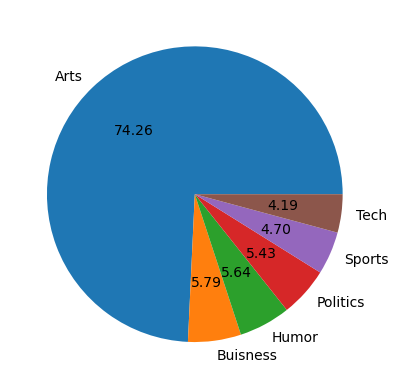

In [109]:
plt.pie(df['Category'].value_counts(), labels=['Arts', 'Buisness', 'Humor', 'Politics', 'Sports', 'Tech'],  autopct="%0.2f")
plt.show

In [110]:
#classifying all categories into alphabets, words, sentences so as to analyse which category contains what type of words

In [111]:
!pip install nltk

In [112]:
import nltk

In [113]:
df['num_alphabet_title']=df['News_title'].apply(len)

In [114]:
df.head(5)

,ID,News_title,News_headline,Category,num_alphabet_title
0,1,"Do men enjoy sex more, or women? The Mahabhara...","[Book Extract] From Anushasana Parva, translat...",0,56
1,2,Why you should eat the Demonetisation laddoo,One laddoo equals to one lakh in your Jan Dhan...,2,44
2,3,Is the world headed for a new Cold War?,The battle lines have become very clear with R...,3,39
3,4,"Demonetisation is all about Modi, either you'r...",How many times should this hypocritical drama ...,1,72
4,5,Why electoral bonds won't clean up political f...,Union finance minister Arun Jaitley needs to p...,3,52


In [116]:
df['num_alphabet_head']=df['News_headline'].apply(len)

In [117]:
df.head(5)

,ID,News_title,News_headline,Category,num_alphabet_title,num_alphabet_head
0,1,"Do men enjoy sex more, or women? The Mahabhara...","[Book Extract] From Anushasana Parva, translat...",0,56,66
1,2,Why you should eat the Demonetisation laddoo,One laddoo equals to one lakh in your Jan Dhan...,2,44,72
2,3,Is the world headed for a new Cold War?,The battle lines have become very clear with R...,3,39,131
3,4,"Demonetisation is all about Modi, either you'r...",How many times should this hypocritical drama ...,1,72,87
4,5,Why electoral bonds won't clean up political f...,Union finance minister Arun Jaitley needs to p...,3,52,126


In [118]:
df['num_words_title']=df['News_title'].apply(lambda x:len(nltk.word_tokenize(x)))

In [119]:
df['num_words_head']=df['News_headline'].apply(lambda x:len(nltk.word_tokenize(x)))

In [120]:
df['num_sent_title']=df['News_title'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [121]:
df['num_sent_head']=df['News_headline'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [122]:
df.head(5)

,ID,News_title,News_headline,Category,num_alphabet_title,num_alphabet_head,num_words_title,num_words_head,num_sent_title,num_sent_head
0,1,"Do men enjoy sex more, or women? The Mahabhara...","[Book Extract] From Anushasana Parva, translat...",0,56,66,12,13,2,1
1,2,Why you should eat the Demonetisation laddoo,One laddoo equals to one lakh in your Jan Dhan...,2,44,72,7,15,1,1
2,3,Is the world headed for a new Cold War?,The battle lines have become very clear with R...,3,39,131,10,22,1,1
3,4,"Demonetisation is all about Modi, either you'r...",How many times should this hypocritical drama ...,1,72,87,14,17,1,1
4,5,Why electoral bonds won't clean up political f...,Union finance minister Arun Jaitley needs to p...,3,52,126,9,22,1,1


In [123]:
import seaborn as sns

C:\Users\samru\Downloads\idk\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\samru\Downloads\idk\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\samru\Downloads\idk\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\samru\Downloads\idk\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN 

<Axes: xlabel='num_alphabet_title', ylabel='Count'>

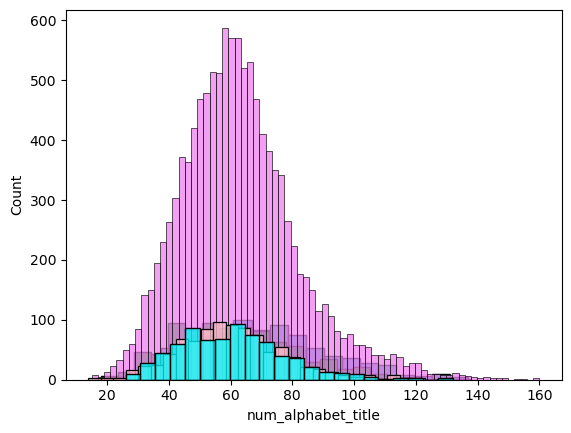

In [141]:
sns.histplot(df[df['Category']==0]['num_alphabet_title'])
sns.histplot(df[df['Category']==1]['num_alphabet_title'], color='red')
sns.histplot(df[df['Category']==2]['num_alphabet_title'], color='green')
sns.histplot(df[df['Category']==3]['num_alphabet_title'], color='violet')
sns.histplot(df[df['Category']==4]['num_alphabet_title'], color='pink')
sns.histplot(df[df['Category']==5]['num_alphabet_title'], color='cyan')
##arts wrt number of alphabets in title

C:\Users\samru\Downloads\idk\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\samru\Downloads\idk\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\samru\Downloads\idk\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\samru\Downloads\idk\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN 

<Axes: xlabel='num_alphabet_head', ylabel='Count'>

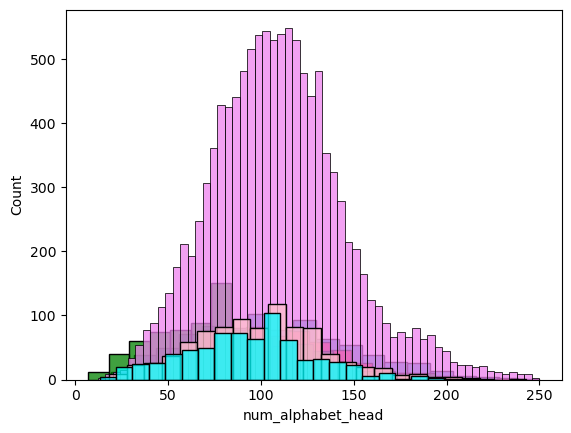

In [142]:
sns.histplot(df[df['Category']==0]['num_alphabet_head'])
sns.histplot(df[df['Category']==1]['num_alphabet_head'], color='red')
sns.histplot(df[df['Category']==2]['num_alphabet_head'], color='green')
sns.histplot(df[df['Category']==3]['num_alphabet_head'], color='violet')
sns.histplot(df[df['Category']==4]['num_alphabet_head'],color='pink' )
sns.histplot(df[df['Category']==5]['num_alphabet_head'], color='cyan')

C:\Users\samru\Downloads\idk\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\samru\Downloads\idk\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\samru\Downloads\idk\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\samru\Downloads\idk\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN 

<function matplotlib.pyplot.show(close=None, block=None)>

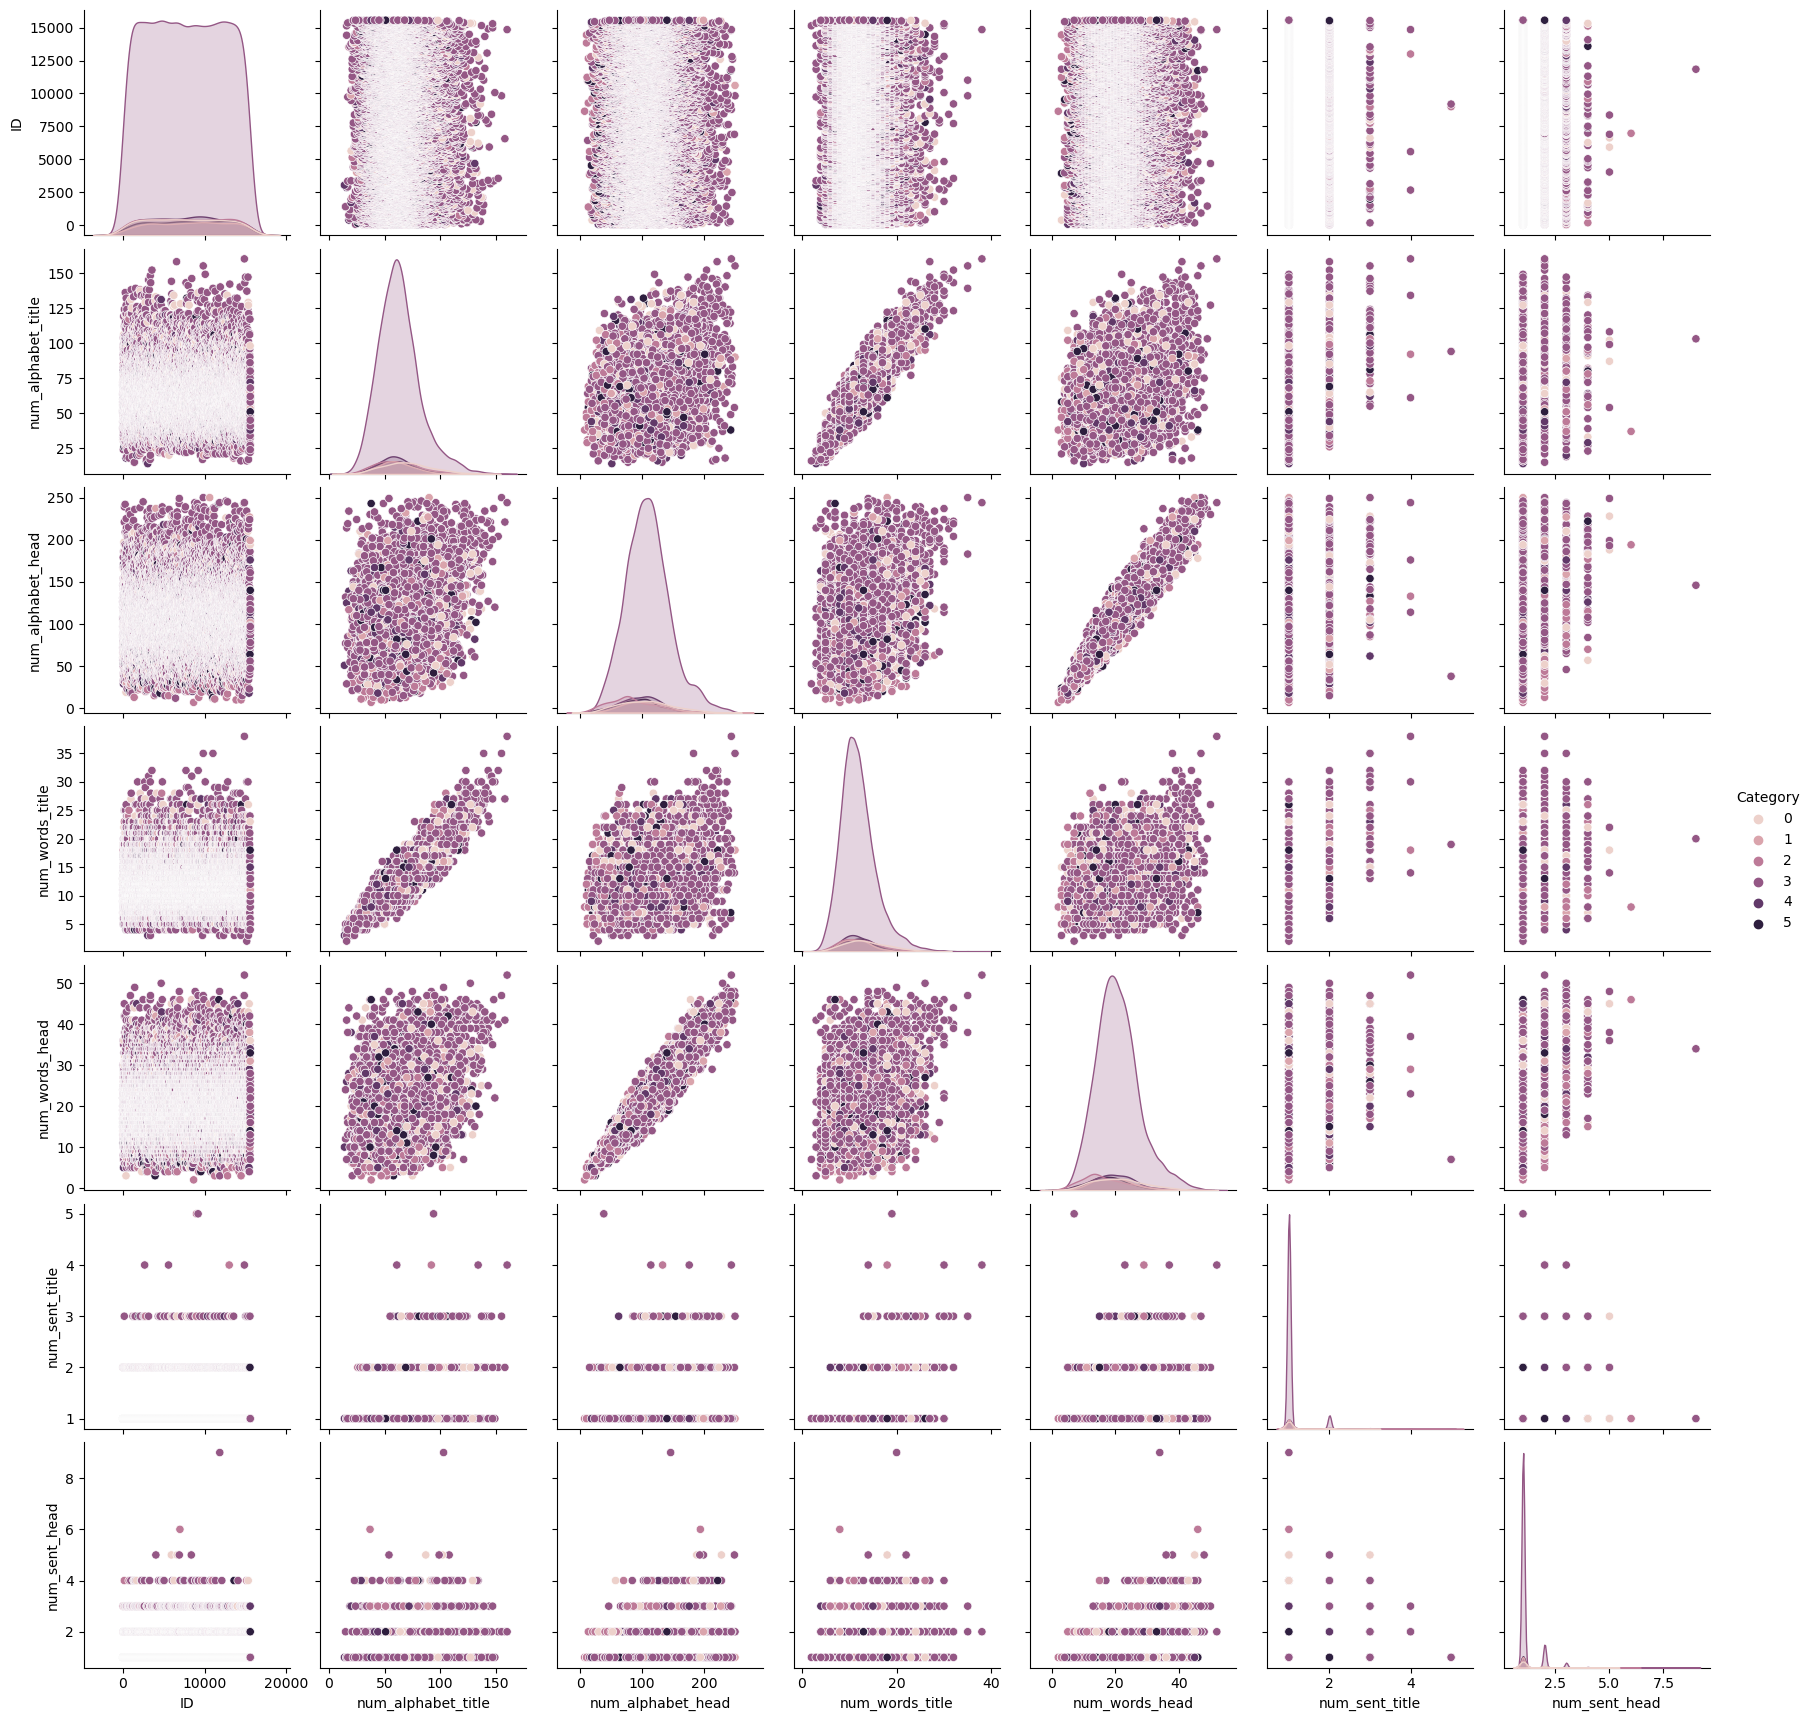

In [146]:
sns.pairplot(df, hue='Category')
plt.show

In [147]:
correlation_matrix = df[['Category','num_alphabet_title','num_alphabet_head', 'num_words_title','num_words_head', 'num_sent_title', 'num_sent_head' ]].corr()

<Axes: >

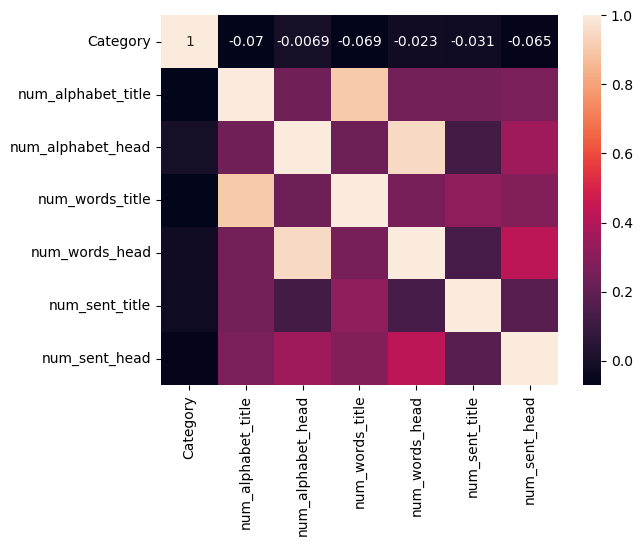

In [148]:
sns.heatmap(correlation_matrix, annot=True)

TEXT PREPROCESSING
-CONVERT TO LOWERCASE
-TOKENIZATION
-REMOVING SPECIAL CHARECTERS
-REMOVING PUNCTUATION MARKS AND STOP WORDS
-STEMMING

In [185]:
def transform_text(text):
    text=text.lower()
    text=nltk.word_tokenize(text)
    y=[]
    for i in text:
        #remove special charecters
        if i.isalnum():
            y.append(i)
    text=y[:]
    y.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    text=y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))
    return y 

In [186]:
transform_text('HI @#.,8(() Im %^ SamRUDdhi who are You hybrid chameleon')

['hi', 'im', 'samruddhi', 'hybrid', 'chameleon']

In [187]:
from nltk.corpus import stopwords

In [188]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [189]:
import string

In [190]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [191]:
from nltk.stem.porter import PorterStemmer

In [192]:
ps=PorterStemmer()

In [221]:
ps.stem('mahabharata')

'mahabharata'

In [194]:
df['transformed_title']=df['News_title'].apply(transform_text)

In [195]:
df.head(5)

,ID,News_title,News_headline,Category,num_alphabet_title,num_alphabet_head,num_words_title,num_words_head,num_sent_title,num_sent_head,transformed_title
0,1,"Do men enjoy sex more, or women? The Mahabhara...","[Book Extract] From Anushasana Parva, translat...",0,56,66,12,13,2,1,"[men, enjoy, sex, women, mahabharata, answer]"
1,2,Why you should eat the Demonetisation laddoo,One laddoo equals to one lakh in your Jan Dhan...,2,44,72,7,15,1,1,"[eat, demonetis, laddoo]"
2,3,Is the world headed for a new Cold War?,The battle lines have become very clear with R...,3,39,131,10,22,1,1,"[world, head, new, cold, war]"
3,4,"Demonetisation is all about Modi, either you'r...",How many times should this hypocritical drama ...,1,72,87,14,17,1,1,"[demonetis, modi, either, india]"
4,5,Why electoral bonds won't clean up political f...,Union finance minister Arun Jaitley needs to p...,3,52,126,9,22,1,1,"[elector, bond, wo, clean, polit, fund]"


In [196]:
df['transformed_headline']=df['News_headline'].apply(transform_text)

In [197]:
df.head(5)

,ID,News_title,News_headline,Category,num_alphabet_title,num_alphabet_head,num_words_title,num_words_head,num_sent_title,num_sent_head,transformed_title,transformed_headline
0,1,"Do men enjoy sex more, or women? The Mahabhara...","[Book Extract] From Anushasana Parva, translat...",0,56,66,12,13,2,1,"[men, enjoy, sex, women, mahabharata, answer]","[book, extract, anushasana, parva, translat, a..."
1,2,Why you should eat the Demonetisation laddoo,One laddoo equals to one lakh in your Jan Dhan...,2,44,72,7,15,1,1,"[eat, demonetis, laddoo]","[one, laddoo, equal, one, lakh, jan, dhan, acc..."
2,3,Is the world headed for a new Cold War?,The battle lines have become very clear with R...,3,39,131,10,22,1,1,"[world, head, new, cold, war]","[battl, line, becom, clear, russia, iran, supp..."
3,4,"Demonetisation is all about Modi, either you'r...",How many times should this hypocritical drama ...,1,72,87,14,17,1,1,"[demonetis, modi, either, india]","[mani, time, hypocrit, drama, play, bother, le..."
4,5,Why electoral bonds won't clean up political f...,Union finance minister Arun Jaitley needs to p...,3,52,126,9,22,1,1,"[elector, bond, wo, clean, polit, fund]","[union, financ, minist, arun, jaitley, need, p..."


In [198]:
df['text']=df['transformed_title']+df['transformed_headline']

In [199]:
df.head(5)

,ID,News_title,News_headline,Category,num_alphabet_title,num_alphabet_head,num_words_title,num_words_head,num_sent_title,num_sent_head,transformed_title,transformed_headline,text
0,1,"Do men enjoy sex more, or women? The Mahabhara...","[Book Extract] From Anushasana Parva, translat...",0,56,66,12,13,2,1,"[men, enjoy, sex, women, mahabharata, answer]","[book, extract, anushasana, parva, translat, a...","[men, enjoy, sex, women, mahabharata, answer, ..."
1,2,Why you should eat the Demonetisation laddoo,One laddoo equals to one lakh in your Jan Dhan...,2,44,72,7,15,1,1,"[eat, demonetis, laddoo]","[one, laddoo, equal, one, lakh, jan, dhan, acc...","[eat, demonetis, laddoo, one, laddoo, equal, o..."
2,3,Is the world headed for a new Cold War?,The battle lines have become very clear with R...,3,39,131,10,22,1,1,"[world, head, new, cold, war]","[battl, line, becom, clear, russia, iran, supp...","[world, head, new, cold, war, battl, line, bec..."
3,4,"Demonetisation is all about Modi, either you'r...",How many times should this hypocritical drama ...,1,72,87,14,17,1,1,"[demonetis, modi, either, india]","[mani, time, hypocrit, drama, play, bother, le...","[demonetis, modi, either, india, mani, time, h..."
4,5,Why electoral bonds won't clean up political f...,Union finance minister Arun Jaitley needs to p...,3,52,126,9,22,1,1,"[elector, bond, wo, clean, polit, fund]","[union, financ, minist, arun, jaitley, need, p...","[elector, bond, wo, clean, polit, fund, union,..."


In [200]:
new_df=df[['ID', 'text','Category']]

In [202]:
new_df.head(20)

,ID,text,Category
0,1,"[men, enjoy, sex, women, mahabharata, answer, ...",0
1,2,"[eat, demonetis, laddoo, one, laddoo, equal, o...",2
2,3,"[world, head, new, cold, war, battl, line, bec...",3
3,4,"[demonetis, modi, either, india, mani, time, h...",1
4,5,"[elector, bond, wo, clean, polit, fund, union,...",3
5,6,"[booz, beef, gambl, goa, bjp, hindutva, dilut,...",3
6,7,"[beef, polit, take, bite, meghalaya, bjp, part...",3
7,8,"[shivraj, singh, chouhan, modi, talk, social, ...",3
8,9,"[mark, chennai, bala, vidya, mandir, school, s...",3
9,10,"[refrain, india, arm, forc, wrong, hurt, us, p...",3


In [203]:
#generate word cloud

In [204]:
from wordcloud import WordCloud

In [205]:
wc=WordCloud(width=500, height=500, min_font_size=10, background_color='black')

In [208]:
text_data = df[df['Category'] == 0]['text'].fillna("").astype(str)

<Figure size 2000x1000 with 0 Axes>

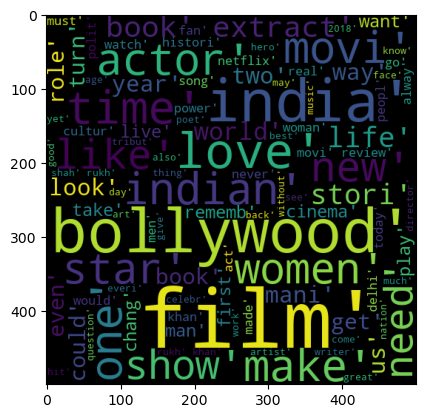

<Figure size 2000x1000 with 0 Axes>

In [212]:
arts_wc = wc.generate(text_data.str.cat(sep=" "))
plt.imshow(arts_wc)
plt.figure(figsize=(20,10))

<Figure size 2000x1000 with 0 Axes>

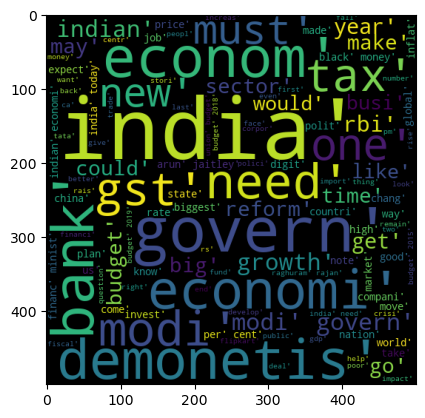

<Figure size 2000x1000 with 0 Axes>

In [213]:
text_data = df[df['Category'] == 1]['text'].fillna("").astype(str)
buisness_wc = wc.generate(text_data.str.cat(sep=" "))
plt.imshow(buisness_wc)
plt.figure(figsize=(20,10))

<Figure size 2000x1000 with 0 Axes>

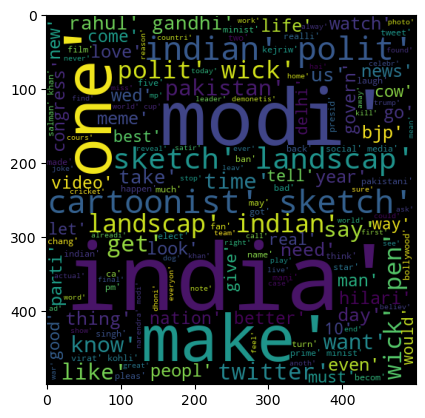

<Figure size 2000x1000 with 0 Axes>

In [214]:
text_data = df[df['Category'] == 2]['text'].fillna("").astype(str)
humor_wc = wc.generate(text_data.str.cat(sep=" "))
plt.imshow(humor_wc)
plt.figure(figsize=(20,10))

<Figure size 2000x1000 with 0 Axes>

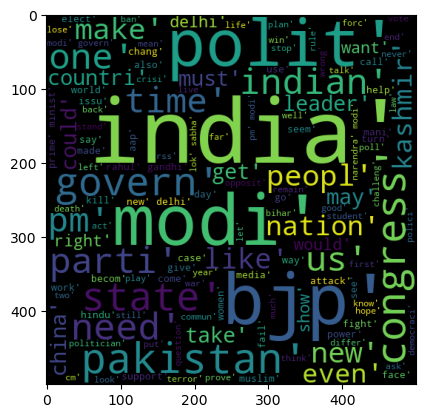

<Figure size 2000x1000 with 0 Axes>

In [215]:
text_data = df[df['Category'] == 3]['text'].fillna("").astype(str)
politics_wc = wc.generate(text_data.str.cat(sep=" "))
plt.imshow(politics_wc)
plt.figure(figsize=(20,10))

<Figure size 2000x1000 with 0 Axes>

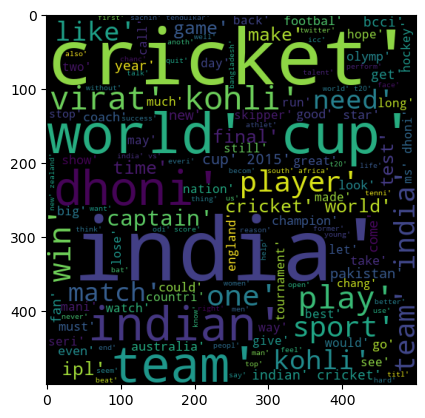

<Figure size 2000x1000 with 0 Axes>

In [216]:
text_data = df[df['Category'] == 4]['text'].fillna("").astype(str)
sports_wc = wc.generate(text_data.str.cat(sep=" "))
plt.imshow(sports_wc)
plt.figure(figsize=(20,10))

<Figure size 2000x1000 with 0 Axes>

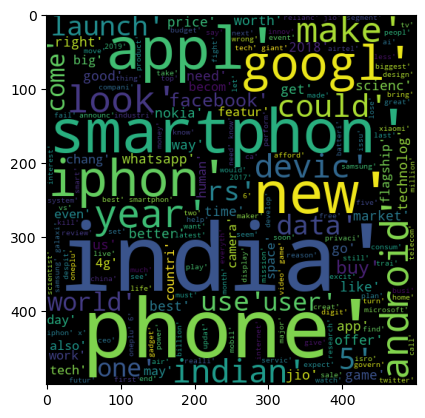

<Figure size 2000x1000 with 0 Axes>

In [241]:
text_data = df[df['Category'] == 5]['text'].fillna("").astype(str)
tech_wc = wc.generate(text_data.str.cat(sep=" "))
plt.imshow(tech_wc)
plt.figure(figsize=(20,10))

In [218]:
#find top 30 words

In [220]:
new_df.head(5)

,ID,text,Category
0,1,"[men, enjoy, sex, women, mahabharata, answer, ...",0
1,2,"[eat, demonetis, laddoo, one, laddoo, equal, o...",2
2,3,"[world, head, new, cold, war, battl, line, bec...",3
3,4,"[demonetis, modi, either, india, mani, time, h...",1
4,5,"[elector, bond, wo, clean, polit, fund, union,...",3


MODEL BUILDING

In [245]:
df_train=new_df

In [250]:
df_train['text'] = df_train['text'].apply(lambda x: ' '.join(x) if isinstance(x, list) else x)

C:\Users\samru\AppData\Local\Temp\ipykernel_402364\12038369.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['text'] = df_train['text'].apply(lambda x: ' '.join(x) if isinstance(x, list) else x)


In [251]:
df_train.head(5)

,ID,text,Category
0,1,men enjoy sex women mahabharata answer book ex...,0
1,2,eat demonetis laddoo one laddoo equal one lakh...,2
2,3,world head new cold war battl line becom clear...,3
3,4,demonetis modi either india mani time hypocrit...,1
4,5,elector bond wo clean polit fund union financ ...,3


In [252]:
#trying naive bayes first since its most efficient with text input

In [253]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [254]:
cv=CountVectorizer()

In [296]:
x=cv.fit_transform(df_train['text']).toarray()

In [297]:
x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [298]:
y=df_train['Category'].values

In [299]:
y

array([0, 2, 3, ..., 3, 3, 3])

In [300]:
x_train=x

In [301]:
y_train=y

In [302]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB

In [303]:
gb=GaussianNB()

In [304]:
mb=MultinomialNB()

In [305]:
bnb=BernoulliNB()

In [306]:
gb.fit(x_train, y_train)

GaussianNB()

In [307]:
mb.fit(x_train, y_train)

MultinomialNB()

In [309]:
df_test=pd.read_csv('test.csv')

In [310]:
df_test.head(5)

,ID,News_title,News_headline
0,1,How Blockchain can usher land reforms in the c...,"With multiple entities in the system, entruste..."
1,2,What Kamal Nath as president means for Congres...,With anti-incumbency building up against the S...
2,3,Why BJP's sweep in Rajasthan civic polls shoul...,The party lost in the chief minister's and her...
3,4,Harsha Bhogle got the boot for rising intolera...,It is Indian cricket's loss for it has once ag...
4,5,Amit Shah fighting Lok Sabha in Gandhinagar is...,Amit Shah has proven his capabilities often. T...


In [311]:
df_test['transformed_title']=df_test['News_title'].apply(transform_text)

In [312]:
df_test.isnull().sum()

ID                    0
News_title            0
News_headline        16
transformed_title     0
dtype: int64

In [313]:
df_test= df_test.dropna(subset=['News_headline'])

In [314]:
df_test.isnull().sum()

ID                   0
News_title           0
News_headline        0
transformed_title    0
dtype: int64

In [315]:
df_test['transformed_headline']=df_test['News_headline'].apply(transform_text)

In [316]:
df_test['text']=df_test['transformed_title']+df_test['transformed_headline']

In [317]:
df_test1=df_test[['ID', 'text']]

In [318]:
df_test1.head(5)

,ID,text
0,1,"[blockchain, usher, land, reform, countri, mul..."
1,2,"[kamal, nath, presid, mean, congress, madhya, ..."
2,3,"[bjp, sweep, rajasthan, civic, poll, worri, va..."
3,4,"[harsha, bhogl, got, boot, rise, intoler, nati..."
4,5,"[amit, shah, fight, lok, sabha, gandhinagar, s..."


In [319]:
df_test1['text'] = df_test1['text'].apply(lambda x: ' '.join(x) if isinstance(x, list) else x)

C:\Users\samru\AppData\Local\Temp\ipykernel_402364\1686703038.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test1['text'] = df_test1['text'].apply(lambda x: ' '.join(x) if isinstance(x, list) else x)


In [329]:
df_test1.head(5)

,ID,text
0,1,blockchain usher land reform countri multipl e...
1,2,kamal nath presid mean congress madhya pradesh...
2,3,bjp sweep rajasthan civic poll worri vasundhar...
3,4,harsha bhogl got boot rise intoler nation indi...
4,5,amit shah fight lok sabha gandhinagar surpris ...


In [330]:
x_train.shape

(15500, 16975)

In [332]:
x_test = cv.transform(df_test1['text']).toarray()

In [333]:
x_test.shape

(3468, 16975)

In [334]:
y_pred1=gb.predict(x_test)

In [335]:
output_df = pd.DataFrame({'ID':df_test1['ID'],'predictions': y_pred1})

In [336]:
output_df.head(20)

,ID,predictions
0,1,3
1,2,3
2,3,3
3,4,4
4,5,3
5,6,3
6,7,2
7,8,4
8,9,3
9,10,3


In [339]:
output_df.to_csv('predictions.csv', index=False)